In [217]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import random

In [218]:
file_path = "netcdf_files/southern-ocean-chla-uniform.nc"

# Open the NetCDF file
ds = xr.open_dataset(file_path)
ds

<xarray.Dataset> Size: 513MB
Dimensions:           (N_PROF: 47277, PRES_ADJUSTED: 401)
Coordinates:
  * N_PROF            (N_PROF) int32 189kB 0 1 2 3 4 ... 49518 49519 49520 49521
  * PRES_ADJUSTED     (PRES_ADJUSTED) int32 2kB 0 5 10 15 ... 1990 1995 2000
    JULD              (N_PROF) datetime64[ns] 378kB ...
    LATITUDE          (N_PROF) float64 378kB ...
    LONGITUDE         (N_PROF) float64 378kB ...
Data variables:
    POSITION_QC       (N_PROF) |S1 47kB ...
    TEMP_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 152MB ...
    TEMP_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) |S1 19MB ...
    PSAL_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 152MB ...
    PSAL_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) |S1 19MB ...
    CHLA_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 152MB ...
    CHLA_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) |S1 19MB ...

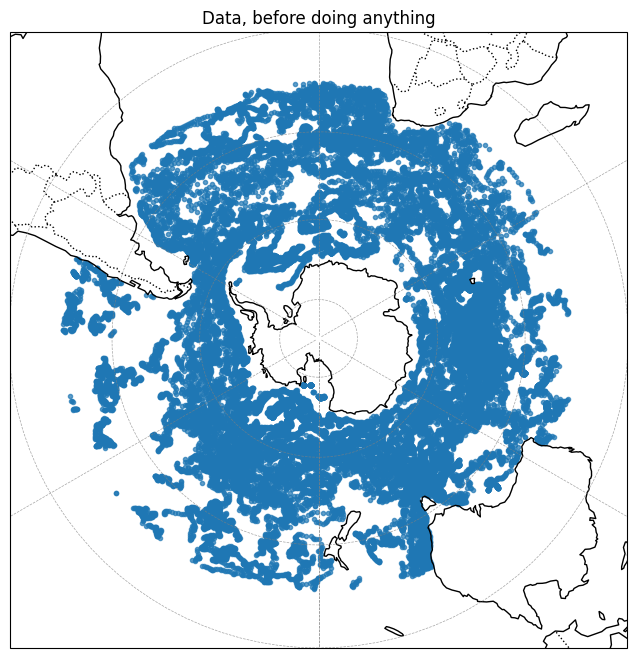

In [219]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Plot the geographic scatter map with Cartopy
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -20], crs=ccrs.PlateCarree())  # Define extent for better visualization

# Add scatter points for the clusters
scatter = plt.scatter(
    ds['LONGITUDE'],
    ds['LATITUDE'],
    alpha=0.7,
    marker='.',
    transform=ccrs.PlateCarree()
)

# Add features to the map
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')

# Add labels and title
plt.title("Data, before doing anything", fontsize=12)

# Show the plot
plt.show()


In [220]:
ds['CHLA_ADJUSTED'].sel(N_PROF=49521, method='nearest').values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [221]:
ds['CHLA_ADJUSTED_QC'].sel(N_PROF=7631, method='nearest').values

array([b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'1', b'', b'1', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'',
       b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', b'', 

In [222]:
# dropping profiles based on QC flag

ds_dropped = ds.copy()
# ds_dropped = ds_dropped.where(ds_dropped['CHLA_ADJUSTED_QC'] != b'', drop=True)
# ds_dropped = ds_dropped.where(ds_dropped['CHLA_ADJUSTED_QC'] != b'3', drop=True)
# ds_dropped = ds_dropped.where(ds_dropped['CHLA_ADJUSTED_QC'] != b'4', drop=True)
ds_dropped

<xarray.Dataset> Size: 513MB
Dimensions:           (N_PROF: 47277, PRES_ADJUSTED: 401)
Coordinates:
  * N_PROF            (N_PROF) int32 189kB 0 1 2 3 4 ... 49518 49519 49520 49521
  * PRES_ADJUSTED     (PRES_ADJUSTED) int32 2kB 0 5 10 15 ... 1990 1995 2000
    JULD              (N_PROF) datetime64[ns] 378kB ...
    LATITUDE          (N_PROF) float64 378kB -30.19 -30.48 ... -64.32 -64.44
    LONGITUDE         (N_PROF) float64 378kB -0.7675 -0.9496 ... 73.39 73.2
Data variables:
    POSITION_QC       (N_PROF) |S1 47kB ...
    TEMP_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 152MB ...
    TEMP_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) |S1 19MB ...
    PSAL_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 152MB ...
    PSAL_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) |S1 19MB ...
    CHLA_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 152MB ...
    CHLA_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) |S1 19MB ...

In [223]:
ds_dropped['CHLA_ADJUSTED'].sel(N_PROF=7631, method='nearest').values

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        

In [224]:
limit = 400  # fill everything, we only have 400 levels

ds_interpolated = ds_dropped.copy()
ds_interpolated['CHLA_ADJUSTED'] = ds_interpolated['CHLA_ADJUSTED'].interpolate_na(dim='PRES_ADJUSTED', method='linear')
ds_interpolated['CHLA_ADJUSTED'] = ds_interpolated['CHLA_ADJUSTED'].bfill(dim='PRES_ADJUSTED', limit=limit)
ds_interpolated['CHLA_ADJUSTED'] = ds_interpolated['CHLA_ADJUSTED'].ffill(dim='PRES_ADJUSTED', limit=limit)
ds_interpolated

<xarray.Dataset> Size: 513MB
Dimensions:           (N_PROF: 47277, PRES_ADJUSTED: 401)
Coordinates:
  * N_PROF            (N_PROF) int32 189kB 0 1 2 3 4 ... 49518 49519 49520 49521
  * PRES_ADJUSTED     (PRES_ADJUSTED) int32 2kB 0 5 10 15 ... 1990 1995 2000
    JULD              (N_PROF) datetime64[ns] 378kB ...
    LATITUDE          (N_PROF) float64 378kB -30.19 -30.48 ... -64.32 -64.44
    LONGITUDE         (N_PROF) float64 378kB -0.7675 -0.9496 ... 73.39 73.2
Data variables:
    POSITION_QC       (N_PROF) |S1 47kB ...
    TEMP_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 152MB ...
    TEMP_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) |S1 19MB ...
    PSAL_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 152MB ...
    PSAL_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) |S1 19MB ...
    CHLA_ADJUSTED     (N_PROF, PRES_ADJUSTED) float64 152MB 0.2017 ... nan
    CHLA_ADJUSTED_QC  (N_PROF, PRES_ADJUSTED) |S1 19MB ...

In [225]:
ds_interpolated.sel(N_PROF=13698, method='nearest')

<xarray.Dataset> Size: 12kB
Dimensions:           (PRES_ADJUSTED: 401)
Coordinates:
    N_PROF            int32 4B 13698
  * PRES_ADJUSTED     (PRES_ADJUSTED) int32 2kB 0 5 10 15 ... 1990 1995 2000
    JULD              datetime64[ns] 8B ...
    LATITUDE          float64 8B -31.17
    LONGITUDE         float64 8B -133.8
Data variables:
    POSITION_QC       |S1 1B ...
    TEMP_ADJUSTED     (PRES_ADJUSTED) float64 3kB ...
    TEMP_ADJUSTED_QC  (PRES_ADJUSTED) |S1 401B ...
    PSAL_ADJUSTED     (PRES_ADJUSTED) float64 3kB ...
    PSAL_ADJUSTED_QC  (PRES_ADJUSTED) |S1 401B ...
    CHLA_ADJUSTED     (PRES_ADJUSTED) float64 3kB 0.0036 0.0036 ... 0.003688
    CHLA_ADJUSTED_QC  (PRES_ADJUSTED) |S1 401B ...

In [226]:
ds_interpolated.sel(N_PROF=49521, method='nearest')

<xarray.Dataset> Size: 12kB
Dimensions:           (PRES_ADJUSTED: 401)
Coordinates:
    N_PROF            int32 4B 49521
  * PRES_ADJUSTED     (PRES_ADJUSTED) int32 2kB 0 5 10 15 ... 1990 1995 2000
    JULD              datetime64[ns] 8B ...
    LATITUDE          float64 8B -64.44
    LONGITUDE         float64 8B 73.2
Data variables:
    POSITION_QC       |S1 1B ...
    TEMP_ADJUSTED     (PRES_ADJUSTED) float64 3kB ...
    TEMP_ADJUSTED_QC  (PRES_ADJUSTED) |S1 401B ...
    PSAL_ADJUSTED     (PRES_ADJUSTED) float64 3kB ...
    PSAL_ADJUSTED_QC  (PRES_ADJUSTED) |S1 401B ...
    CHLA_ADJUSTED     (PRES_ADJUSTED) float64 3kB nan nan nan ... nan nan nan
    CHLA_ADJUSTED_QC  (PRES_ADJUSTED) |S1 401B ...

In [227]:
chla = ds_interpolated['CHLA_ADJUSTED']
chla

<xarray.DataArray 'CHLA_ADJUSTED' (N_PROF: 47277, PRES_ADJUSTED: 401)> Size: 152MB
array([[0.201674  , 0.201674  , 0.201674  , ..., 0.007868  , 0.007868  ,
        0.007868  ],
       [0.147548  , 0.147548  , 0.147548  , ..., 0.00712226, 0.00660772,
        0.00660772],
       [0.21389601, 0.21389601, 0.21389601, ..., 0.00792448, 0.00835243,
        0.00835243],
       ...,
       [0.0432    , 0.0432    , 0.0432    , ..., 0.0432    , 0.0432    ,
        0.0432    ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])
Coordinates:
  * N_PROF         (N_PROF) int32 189kB 0 1 2 3 4 ... 49518 49519 49520 49521
  * PRES_ADJUSTED  (PRES_ADJUSTED) int32 2kB 0 5 10 15 ... 1985 1990 1995 2000
    JULD           (N_PROF) datetime64[ns] 378kB ...
    LATITUDE       (N_PROF) float64 378kB -30.19 -30.48 -30.7 ... -64.32 -64.44
    LONGITUDE      (N_PROF) float64 378kB -0.7675 -0.9496 -0.8953 ... 73.39 73.2
Attributes:
    long_name:       Chlorophyll-A
    standard_name:   mass_concentration_of_chlorophyll_a_in_sea_water
    units:           mg/m3
    C_format:        %.4f
    FORTRAN_format:  F.4
    resolution:      0.025

In [228]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [229]:
chla_dropped = chla.dropna(dim='N_PROF', how='all')
chla_dropped

<xarray.DataArray 'CHLA_ADJUSTED' (N_PROF: 38306, PRES_ADJUSTED: 401)> Size: 123MB
array([[0.201674  , 0.201674  , 0.201674  , ..., 0.007868  , 0.007868  ,
        0.007868  ],
       [0.147548  , 0.147548  , 0.147548  , ..., 0.00712226, 0.00660772,
        0.00660772],
       [0.21389601, 0.21389601, 0.21389601, ..., 0.00792448, 0.00835243,
        0.00835243],
       ...,
       [0.1296    , 0.1296    , 0.1296    , ..., 0.1296    , 0.1296    ,
        0.1296    ],
       [0.61559999, 0.61559999, 0.61559999, ..., 0.61559999, 0.61559999,
        0.61559999],
       [0.0432    , 0.0432    , 0.0432    , ..., 0.0432    , 0.0432    ,
        0.0432    ]])
Coordinates:
  * N_PROF         (N_PROF) int32 153kB 0 1 2 3 4 ... 49493 49494 49512 49519
  * PRES_ADJUSTED  (PRES_ADJUSTED) int32 2kB 0 5 10 15 ... 1985 1990 1995 2000
    JULD           (N_PROF) datetime64[ns] 306kB ...
    LATITUDE       (N_PROF) float64 306kB -30.19 -30.48 -30.7 ... -64.49 -64.43
    LONGITUDE      (N_PROF) float64 306kB -0.7675 -0.9496 ... 70.64 73.63
Attributes:
    long_name:       Chlorophyll-A
    standard_name:   mass_concentration_of_chlorophyll_a_in_sea_water
    units:           mg/m3
    C_format:        %.4f
    FORTRAN_format:  F.4
    resolution:      0.025

In [230]:
chla_cleaned_array = chla_dropped.values
profiles, pressure_levels = chla_cleaned_array.shape

chla_cleaned_array

array([[0.201674  , 0.201674  , 0.201674  , ..., 0.007868  , 0.007868  ,
        0.007868  ],
       [0.147548  , 0.147548  , 0.147548  , ..., 0.00712226, 0.00660772,
        0.00660772],
       [0.21389601, 0.21389601, 0.21389601, ..., 0.00792448, 0.00835243,
        0.00835243],
       ...,
       [0.1296    , 0.1296    , 0.1296    , ..., 0.1296    , 0.1296    ,
        0.1296    ],
       [0.61559999, 0.61559999, 0.61559999, ..., 0.61559999, 0.61559999,
        0.61559999],
       [0.0432    , 0.0432    , 0.0432    , ..., 0.0432    , 0.0432    ,
        0.0432    ]])

In [231]:
scaler = StandardScaler()
chla_scaled = scaler.fit_transform(chla_cleaned_array)

chla_scaled

array([[-0.04704595, -0.04704807, -0.04705718, ..., -0.04653102,
        -0.04653102, -0.046531  ],
       [-0.04857943, -0.04858155, -0.04859066, ..., -0.04655214,
        -0.04656672, -0.0465667 ],
       [-0.04669968, -0.0467018 , -0.04671091, ..., -0.04652942,
        -0.0465173 , -0.04651728],
       ...,
       [-0.04908793, -0.04909005, -0.04909916, ..., -0.04308298,
        -0.04308298, -0.04308296],
       [-0.03531874, -0.03532086, -0.03532993, ..., -0.02931711,
        -0.02931711, -0.02931709],
       [-0.05153578, -0.05153791, -0.05154702, ..., -0.04553025,
        -0.04553025, -0.04553023]])

In [232]:
pca = PCA()
chla_pca = pca.fit_transform(chla_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

sum = 0
for i in range(15):
    sum += explained_variance[i]
    print(f'{sum * 100} - {i + 1} Principal Components')

99.99648761110286 - 1 Principal Components
99.99868685955373 - 2 Principal Components
99.99941370549199 - 3 Principal Components
99.99957206661296 - 4 Principal Components
99.99970008730016 - 5 Principal Components
99.99980998031461 - 6 Principal Components
99.99989209079358 - 7 Principal Components
99.9999263203118 - 8 Principal Components
99.9999494544504 - 9 Principal Components
99.99996102599479 - 10 Principal Components
99.99997021780186 - 11 Principal Components
99.99997673555488 - 12 Principal Components
99.999980912168 - 13 Principal Components
99.99998325303471 - 14 Principal Components
99.99998510177895 - 15 Principal Components


In [233]:
n_components = 4
# n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

# Reduce data using the selected components
pca = PCA(n_components=n_components)
chla_reduced = pca.fit_transform(chla_scaled)

chla_reduced

array([[-9.31736533e-01, -6.81493026e-04,  1.74135914e-03,
        -2.22818687e-04],
       [-9.33435172e-01, -1.97504081e-04, -5.29875000e-03,
         4.30539251e-04],
       [-9.32197087e-01, -6.54893944e-04,  1.74962100e-03,
         3.51566126e-05],
       ...,
       [-8.70274932e-01,  1.01401086e-03, -2.50346584e-02,
        -1.33185262e-04],
       [-5.94612439e-01,  1.01236716e-03, -2.50151746e-02,
        -1.33194421e-04],
       [-9.19281600e-01,  1.01430308e-03, -2.50381222e-02,
        -1.33183634e-04]])

In [234]:
# Perform GMM clustering
n_clusters = 4  # Adjust as needed
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
labels = gmm.fit_predict(chla_reduced)


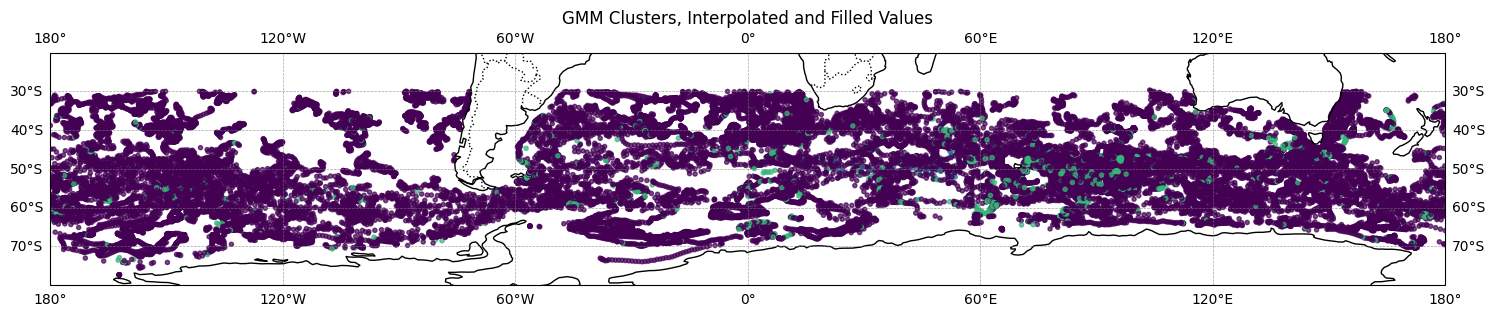

In [235]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Plot the geographic scatter map with Cartopy
plt.figure(figsize=(18, 12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -20, -80], crs=ccrs.PlateCarree())

# Add scatter points for the clusters
scatter = plt.scatter(
    chla_dropped['LONGITUDE'],
    chla_dropped['LATITUDE'],
    c=labels,
    cmap='viridis',
    alpha=0.7,
    marker='.',
    transform=ccrs.PlateCarree()
)

# Add features to the map
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')

# Add labels and title
plt.title("GMM Clusters, Interpolated and Filled Values", fontsize=12)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Show the plot
plt.show()

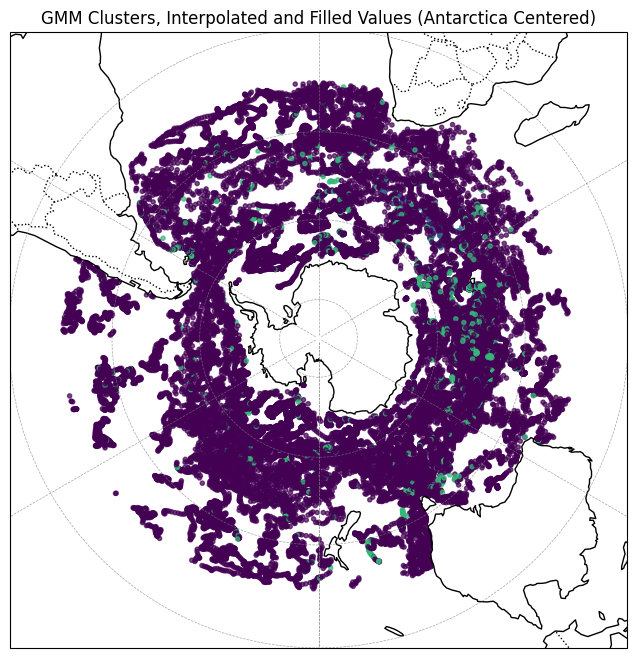

In [236]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Plot the geographic scatter map with Cartopy
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -20], crs=ccrs.PlateCarree())  # Define extent for better visualization

# Add scatter points for the clusters
scatter = plt.scatter(
    chla_dropped['LONGITUDE'],
    chla_dropped['LATITUDE'],
    c=labels,
    cmap='viridis',
    alpha=0.7,
    marker='.',
    transform=ccrs.PlateCarree()
)

# Add features to the map
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=False, linewidth=0.5, color='gray', alpha=0.7, linestyle='--')

# Add labels and title
plt.title("GMM Clusters, Interpolated and Filled Values (Antarctica Centered)", fontsize=12)

# Show the plot
plt.show()


In [239]:
np.where(labels == 1)

(array([16276, 16277, 16278, 16279, 16280, 16281, 16282, 16283, 16284,
        16285, 16286, 16287, 16288, 16289, 16290, 16291, 16292, 16293,
        16294, 16295, 16296, 16297, 16298, 16299, 16300, 16301, 16302,
        16303, 16304, 16305, 16306, 16307, 16308, 16309, 16310, 16311,
        16312, 16313, 16314, 16315, 16316, 16317, 16318, 16319, 16320,
        16321, 16322, 16323, 16324, 16325, 16326, 16327, 16328, 16329,
        16330, 16331, 16332, 16333, 16334, 16335, 16336, 16337, 16338,
        16339, 16340, 16341, 16342, 16343, 16344, 16345, 16346, 16347,
        16348, 16349, 16350, 16351, 16352, 16353, 16354, 16355, 16356],
       dtype=int64),)

In [240]:
chla_dropped[16276]

<xarray.DataArray 'CHLA_ADJUSTED' (PRES_ADJUSTED: 401)> Size: 3kB
array([768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
...
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979, 768.44927979, 768.44927979, 768.44927979,
       768.44927979])
Coordinates:
    N_PROF         int32 4B 19062
  * PRES_ADJUSTED  (PRES_ADJUSTED) int32 2kB 0 5 10 15 ... 1985 1990 1995 2000
    JULD           datetime64[ns] 8B ...
    LATITUDE       float64 8B -47.95
    LONGITUDE      float64 8B 22.34
Attributes:
    long_name:       Chlorophyll-A
    standard_name:   mass_concentration_of_chlorophyll_a_in_sea_water
    units:           mg/m3
    C_format:        %.4f
    FORTRAN_format:  F.4
    resolution:      0.025